In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

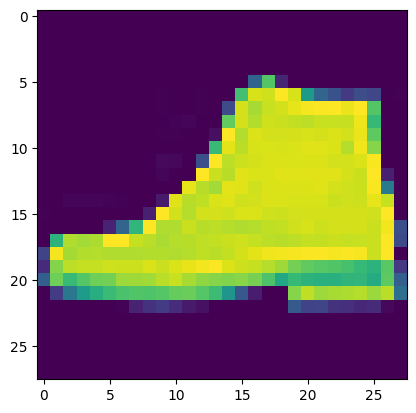

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[42])


In [9]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy' > 0.8):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True


model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9850 - loss: 0.0434
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9841 - loss: 0.0418
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0413
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0357


In [12]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.8005


[0.8025099635124207, 0.8883000016212463]

In [13]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[1.9275502e-30 2.5051370e-28 1.0737474e-24 0.0000000e+00 0.0000000e+00 2.6126591e-16 3.4746775e-24 5.8623967e-11 5.0136834e-23 9.9999994e-01]


In [14]:
print(test_labels[0])

9
